# Popular Numbers, Part 0: Introduction

While [all numbers are interesting](https://en.wikipedia.org/wiki/Interesting_number_paradox), it seems not all numbers are popular ([Guglielmetti, 2009](https://www.drgoulu.com/2009/04/18/nombres-mineralises/); [Gauvrit, Delahaye, Zenil, 2011](https://arxiv.org/abs/1101.4470)).  This prior research was on the [Online Encyclopedia of Integer Sequences (OEIS)](http://oeis.org/), but is this true for other online math resources?  Is popularity a function of the resource or is it a social construct independent of resource?  In this series, I'll try to answer these questions by looking at the popularity of numbers across a few online math resources.

## History

![Diabicus: The Disco Calculator](images/diabicus-discoing.gif)

Confession: This project actually began as [a disco calculator for a friend's daughter](https://github.com/lipschultz/diabicus) (or, a noisy torture device for the friend -- it's a matter of perspective).  I was inspired by [Sam's Disco Calculator](https://www.youtube.com/watch?v=YfIQ7ktFM1g) from the [standupmaths YouTube channel](https://www.youtube.com/user/standupmaths/).  For each calculation, the calculator would show a fact related to the calculation or result.  I collected these facts from two of my favorite math channels on YouTube: standupmaths and [Numberphile](https://www.youtube.com/user/numberphile/), since they served as the inspiration for the disco calculator (see the [Calculator Unboxing playlist](https://www.youtube.com/playlist?list=PLt5AfwLFPxWKAINNfxIdYmFVKuk_F_cQq)).  Eventually, I realized that I have a bunch of data and it'd be ashame if I didn't explore it.

## About the YouTube Data

Because the disco calculator only included facts from Numberphile and standupmaths, the YouTube data I'll be analyzing only includes those channels.  For simplicity, private and hidden videos aren't included (unless there's an obvious link in a public video).  The analysis includes videos up to December 12, 2017, giving a total of 359 Numberphile videos and 98 standupmaths videos.  There are many other math channels on YouTube, but the data collection and analysis are left as exercises to the reader.

The data used in this analysis can be found: [https://github.com/lipschultz/diabicus/blob/d1b1bb2020c6b6ad8e446dbc7d719efc6155a3c5/resources/youtube.json](https://github.com/lipschultz/diabicus/blob/d1b1bb2020c6b6ad8e446dbc7d719efc6155a3c5/resources/youtube.json)

### Annotations

For each video, I recorded the following information:

- `link` to YouTube video
- `title` of the video
- `host` (or hosts) talking about the math/number(s) in the video, but not necessarily everyone involved in making or appearing in the video (e.g. the hosts for [MENACE: the pile of matchboxes which can learn](https://www.youtube.com/watch?v=R9c-_neaxeU) are just Matt Parker, Matthew Scroggs, and Katie Steckles)
- `date` published
- `source` ("Numberphile", "standupmaths")
- links to any relevant [Online Encyclopedia of Integer Sequences (OEIS)](http://oeis.org/) or [Wikipedia](https://en.wikipedia.org/) page
- A `test` to determine what numbers or calculations are featured in the video. It's a python function that takes a formula, its result, and the context (i.e. calculation history), and returns `True` if the formula, result, or context are relevant to the video.  I chose to use a function instead of recording the set of numbers (as is done in OEIS) since some sets would be very large (e.g. set of all integers).

This analysis suffers from having only one annotator: me.  I have probably been inconsistent in my annotations over the months I watched and annotated videos, and the threshold for a number to "feature" in a video is very vague.  In my defense, I didn't have the foresight to realize I'd be using the data to study number popularity.  I hope you can forgive me for not approaching the data collection with the rigor that data analysis (or a child's toy) truly deserves.

Some guidelines I used for determining whether a number was "featured" in the video:

- If the video is about random numbers or randomness (e.g. [An unexpected way to inflate a balloon](https://www.youtube.com/watch?v=un-pTKfC1dQ)), then the video will match a random number in the range [0, 1) unless a different range is more appropriate.
- When a constant is calculated and the error is mentioned (e.g. [computing pi using pies](https://www.youtube.com/watch?v=ZNiRzZ66YN0)), any number within that error range of the constant is considered "featured" in the video.
- Numbers that show up in illustrative examples do not qualify as being featured in the video
    - e.g. [a video about parabolas](https://www.youtube.com/watch?v=zXoJlRFbktw) will use some numbers as coefficients and x or y values, but those numbers aren't "featured" in the video
    - e.g. the [triplets in Apéry's constant](https://www.youtube.com/watch?v=ur-iLy4z3QE)
- Some videos just aren't obviously about numbers (most of [Tadashi's Toys](https://www.youtube.com/playlist?list=PLt5AfwLFPxWI9eDSJREzp1wvOJsjt23H_) are a good example), so these videos don't match any numbers.
- If a set is talked about (e.g. prime numbers or Fibonnacci sequence) but only some numbers from the sequence are included, "all" numbers in the set are considered featured in the video (well, all numbers up to the max I'm considering in this analysis or up to what's included in OEIS or Wikipedia).
    - If a video is about numbers in general (e.g. [Philosophy of Numbers](https://www.youtube.com/watch?v=vA2cdHLKYB8)), then it features all numbers.
    - If a video is about a kind of number (e.g. [Surreal Numbers (writing the first book)](https://www.youtube.com/watch?v=mPn2AdMH7UQ)), then all numbers of that kind are featured.

I welcome annotations from others to establish inter-rater reliability and improve the overall analysis.

The code for determining whether a number is featured in a video can be found here: [https://github.com/lipschultz/diabicus/blob/gap-analysis/number-analysis/compute_popularity.py](https://github.com/lipschultz/diabicus/blob/gap-analysis/number-analysis/compute_popularity.py)

## About the OEIS Data

The [Online Encyclopedia of Integer Sequences (OEIS)](http://oeis.org/) is exactly what it claims to be: an online encyclopedia of integer sequences.  No non-integer values occur in the sequences (although sequences can be about non-integer numbers, e.g. [A000796](http://oeis.org/A000796)), nor are there sequences containing imaginary numbers (although sequences can be about imaginary numbers, e.g. [A002410](http://oeis.org/A002410)).

I downloaded the OEIS data on December 15, 2017; it consists of 296 522 sequences ([download link](http://oeis.org/stripped.gz)).  Unlike the data on the videos, OEIS records a list of numbers in the sequence and [generally caps it at about 180 to 210 characters in a sequence (including commas)](http://oeis.org/FAQ.html#Z07b) (On a side note, [thanks to recent changes at Twitter](https://blog.twitter.com/official/en_us/topics/product/2017/tweetingmadeeasier.html), you can now tweet your favorite OEIS sequence in full #tweetOEIS.).  While generating functions in various programming languages are sometimes available, they are not used in this analysis.  Unfortunately, this has the effect of numbers occurring in a sequence, but not being included in OEIS's rendering of the sequence and therefore not being included in this analysis.

[Guglielmetti, 2009](https://www.drgoulu.com/2009/04/18/nombres-mineralises/) and [Gauvrit, Delahaye, Zenil, 2011](https://arxiv.org/abs/1101.4470) also looked at the popularity of numbers in OEIS, but counted numbers differently.  They counted the total number of occurrences of a number in OEIS.  So if a number occurred more than once in a sequence, it was counted each time.  However, in this series of posts, to be consistent with how I counted numbers in the YouTube videos, I instead count the sequences a number occurs in.  For example, in sequence [A000796](http://oeis.org/A000796) (the digits of Pi), the number `1` occurs nine times.  In prior work, the `1`'s count would increase by nine, while in this analysis it increases by one.

Code for adding the OEIS data to the database of feature numbers can be found here: [https://github.com/lipschultz/diabicus/blob/gap-analysis/number-analysis/compute_oeis_popularity.py](https://github.com/lipschultz/diabicus/blob/gap-analysis/number-analysis/compute_oeis_popularity.py)

## Counting Numbers

While studying the popularity of all numbers would be interesting, time and space constraints limit the set of numbers to consider.   Drawing from previous work on the popularity of integers in OEIS (see [Sloane's Gap](https://www.youtube.com/watch?v=_YysNM2JoFo)), bounds were set at [-10000, +10001) for both real and imaginary numbers.  Along the real axis (a + 0i) and the imaginary axis (0 + bi), I take 0.01-step increments.  For all other complex numbers (a + bi, for a, b != 0), I take unit steps for both a and b.

## Featured Figures and Future Figuring

Important numbers for today's post:

- 359 Numberphile videos annotated
- 98 standupmaths videos annotated
- 1 annotator for videos
- 296 522 OEIS sequences included

With the introduction and overview out of the way, next time I'll take a look at the data and attempt to replicate the prior findings on OEIS.

# Popular Numbers, Part 1: Popularity of Positive Rationals in OEIS

In this series, we're looking at the popularity of numbers in various online math resources.  Previously, I reviewed the data being used in this analysis.  In this part, I'll finally start doing some analysis!  I'll start with a quick overview of the popularity of numbers across the sources, then I'll dive into the OEIS data by trying to replicate the results in the [Sloane's Gap paper](https://arxiv.org/abs/1101.4470) ([Numberphile video on the topic](https://www.youtube.com/watch?v=_YysNM2JoFo)).

## Loading Data

Let's assume that the scripts from [https://github.com/lipschultz/diabicus/blob/gap-analysis/number-analysis/](https://github.com/lipschultz/diabicus/blob/gap-analysis/number-analysis/) have been used to save the data into a database.  Below, I load all the positive rational data.

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('data/data.db')
df_positive_rational = pd.read_sql_query('''SELECT V.source, C.real_part AS number, COUNT(*) AS count
                                            FROM counts C, videos V
                                            WHERE C.imag_part == 0 AND
                                                  C.video_id = V.video_id AND
                                                  0 <= C.real_part AND
                                                  C.real_part <= 10000
                                            GROUP BY V.source, C.real_part''',
                                         conn)

Each source has a different number of videos/sequences, from 98 with standupmaths to 296 522 with OEIS.  Brady, Matt: if you just increase your output to about 81 videos/day, you should be able to catch up in only 10 years -- get on it! (please)). In the meantime, I need to normalize by the number of videos/sequences, which the code below does (saving it in a new column named `pct`).

In [2]:
df_source = pd.read_sql_query('''SELECT source, COUNT(*) as total
                                 FROM videos
                                 GROUP BY source''',
                              conn, index_col='source')
source_totals = df_source['total'].to_dict()
df_positive_rational['pct'] = df_positive_rational.apply(lambda row: row['count']/source_totals[row['source']], axis=1)

## Qualitative Comparison of Sources

With the data loaded, I couldn't wait to see what the popularities look like!

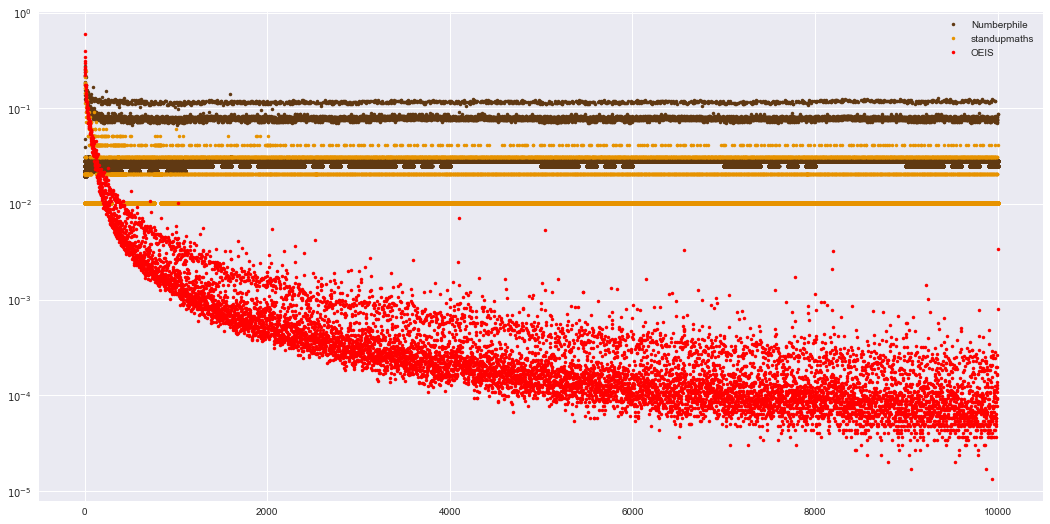

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.rcParams["figure.figsize"] = (18, 9)

colors = {'Numberphile': '#603913', 'standupmaths': '#e79300', 'OEIS': '#ff0000'}

for source, color in colors.items():
    d = df_positive_rational[df_positive_rational['source'] == source]
    plt.semilogy(d.number, d['pct'], marker='.', linestyle='', label=source, color=color)

plt.legend()
plt.show()

The graph above shows OEIS popularity in red, standupmaths in yellow, and Numberphile in brown.  The y-axis is logscale.  A few interesting things pop out.

The Numberphile and standupmaths plots are mostly straight lines, with a slight curve close to zero.  This is in stark contrast with OEIS, which has a general downward trend throughout the graph.  OEIS might be different because of their length threshold on each sequence -- bigger numbers may be dropped and longer sequences truncated.  However, there may be fundamental differences between OEIS and the two YouTube channels.  The people who decide what numbers/sequences to include are different (OEIS has a panel of mathematicians, Numberphile has Dr. Haran and mathematicians, standupmaths has Matt Parker and his guests), possibly leading to different focuses.  Of course, I also annotated the YouTube data (and didn't have a second annotator), so this difference might be my fault.

Both Numberphile and standupmaths have very clearly-defined gaps compared to OEIS.  This might be due to just having less videos than OEIS has sequences: more sequences leads to finer granularity between 0% and 100%, allowing for a muddier gap.  Having more sequences also allows for less popular sequences (e.g. [OEIS keywords](http://oeis.org/eishelp2.html#RK) "dumb", "less", or "obsc"), which Numberphile and standupmaths maybe haven't gotten to (yet?).  The same reasons in the previous paragraph could also apply here.

Finally, almost all OEIS data points are below the other two sources.  This is likely because there are just more sequences in OEIS than videos in Numberphile and standupmaths, and each number just shows up in a small percentage of those sequences.

Now let's dive into the details of the specific curves, starting with OEIS!

## Positive Integers in OEIS

In the graph above, notice that the OEIS data is similar to Figure 1 from the [Sloane's Gap paper](https://arxiv.org/abs/1101.4470), which we'd expect since the data is largely identical.  While there is still a noticeable gap, it is less pronounced than in the Sloane's Gap paper.  I suspect the difference is in how we counted occurrences: they count all occurrences of a number, while I counted the sequences a number appears in.

### Curve

The general downward trend of the popularity appears to be a logarithmic curve (as was used in the Sloane's Gap paper).  Fitting a logarithmic curve to the data shows that it is a good fit:

In [4]:
import numpy as np
from scipy import stats

oeis = df_positive_rational[df_positive_rational['source'] == 'OEIS'].copy()

oeis_regression = stats.linregress(np.log(oeis.number[1:]), np.log(oeis['pct'][1:]))
print('OEIS regression:', oeis_regression)
print()
print('popularity = %f * n^%f' % (np.exp(oeis_regression.intercept), oeis_regression.slope))
oeis_best_fit = lambda n: np.exp(oeis_regression.intercept) * n**oeis_regression.slope

OEIS regression: LinregressResult(slope=-1.2936573821919723, intercept=2.5035990376186987, rvalue=-0.91845336952248591, pvalue=0.0, stderr=0.0055716551335381085)

popularity = 12.226418 * n^-1.293657


The curve is a very good fit at p ≈ 0.0 and r^2 = 0.84 (compared to r^2 = 0.81 in the Sloane's Gap paper).  The slope/exponent is also very similar to the one found in Sloane's Gap paper (exponent = -1.33).

### Classifying the Popular Numbers

As with the Sloane's Gap paper, I'll empirically determine which numbers are popular.  Two curves will determine popularity for the regions [0, 185) and [185, 500).  For 500 and above, I use the same method as Gauvrit et al.: numbers with a popularity above the 82 percentile within the range [n-c, n+c] are labeled popular; for n <= 1000, c = 100, for n > 1000, c = 350.

In [5]:
from collections import namedtuple

Point = namedtuple('Point', ['x', 'y'])

def line_from_points(point1, point2):
    m = (point1.y - point2.y) / (point1.x - point2.x)
    b = point1.y - m*point1.x
    return m, b

point1 = Point(100, 0.0219296)
point2 = Point(185, 0.0178644)
m1, b1 = line_from_points(point1, point2)
threshold_curve1 = lambda x: m1 * x + b1

point3 = Point(499, 0.00609301)
point2log = Point(*[np.log(p) for p in point2])
point3log = Point(*[np.log(p) for p in point3])
m2, b2 = line_from_points(point2log, point3log)
threshold_curve2 = lambda x: np.exp(b2 + m2 * np.log(x))

is_popular = []
for i in range(len(oeis)):
    number = oeis.iloc[i]['number']
    pct = oeis.iloc[i]['pct']
    if number < 185:
        is_popular.append(pct > threshold_curve1(number))
    elif number < 500:
        is_popular.append(pct > threshold_curve2(number))
    else:
        window_size = 100 if number <= 1000 else 350
        lower_bound = max(0, i-window_size)
        upper_bound = min(i+window_size, len(oeis)-1)
        interval = oeis.iloc[lower_bound:upper_bound+1]
        threshold_pct = interval['pct'].quantile(0.82)
        is_popular.append(pct > threshold_pct)

oeis['is_popular'] = is_popular

The figure below shows the classified numbers, the two threshold curves, as well as the line of best fit for all the data.  We also see that there are 1964 positive integers in the popular set, 19.6% of all positive integers considered.

Number of popular integers: 1964
Number of unpopular integers: 8037


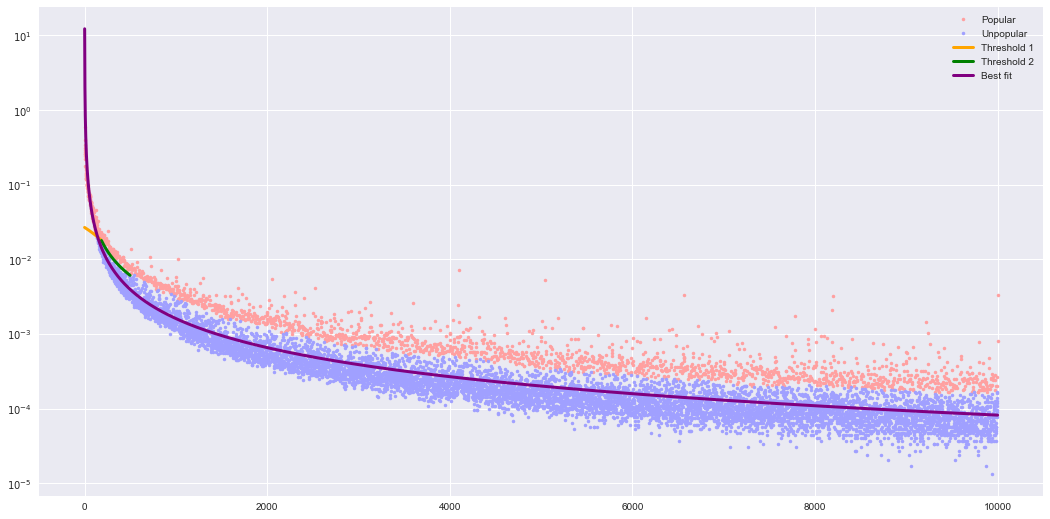

In [6]:
oeis_popular = oeis[oeis.is_popular]
oeis_regular = oeis[~oeis.is_popular]

print('Number of popular integers:', len(oeis_popular))
print('Number of unpopular integers:', len(oeis_regular))

plt.semilogy(oeis_popular.number, oeis_popular['pct'], label='Popular', c='#ffa0a0', marker='.', linestyle='')
plt.semilogy(oeis_regular.number, oeis_regular['pct'], label='Unpopular', c='#a0a0ff', marker='.', linestyle='')
x_1 = [x for x in range(0, 185)]
plt.semilogy(x_1, [threshold_curve1(x) for x in x_1], label='Threshold 1', c='orange', marker='', linestyle='-', linewidth=3)
x_2 = [x for x in range(185, 500)]
plt.semilogy(x_2, [threshold_curve2(x) for x in x_2], label='Threshold 2', c='green', marker='', linestyle='-', linewidth=3)
plt.semilogy(oeis.number[1:], oeis.number[1:].apply(oeis_best_fit), label='Best fit', c='purple', marker='', linestyle='-', linewidth=3)
plt.legend()
plt.show()

### Characterizing the Popular Numbers

Now that we've classified the numbers, let's find out who's in the popular class.

Prior work by [Guglielmetti](https://www.drgoulu.com/2009/04/18/nombres-mineralises/) and [Gauvrit et al.](https://arxiv.org/abs/1101.4470) found that the popular positive integers tend belong to one or more of these sets:
- _`primes`_: Prime numbers
- _`powers`_: Numbers of the form a^b (for a,b ∈ **N**)
- _`squares`_: Square numbers
- _`2^n-1`_: Numbers one less than a power of 2
- _`2^n+1`_: Numbers one more than a power of 2
- _`highlyComposites`_: Guglielmetti defines this as having more divisors than any lower number (i.e. highly composite numbers, see [5040 and other Anti-Prime Numbers](https://www.youtube.com/watch?v=2JM2oImb9Qg))
- _`manyPrimeFactors`_: Gauvrit et al. defines this as when "the number of prime factors (with their multiplicty) exceeds the 95th percentile, corresponding to the interval [n − 100, n + 100]"

The code below tags each number for whether it belongs to one of those seven sets.

In [10]:
import sys
sys.path.append('../src')
import numeric_tools


def get_powers_of(base, starting_exponent=2, no_values_above=10000):
    values = []
    exponent = starting_exponent
    value = base ** exponent
    while value <= no_values_above:
        values.append(value)
        exponent += 1
        value = base ** exponent
    return values

def tag_with_prime_set(df):
    df['is_prime'] = df.number.apply(numeric_tools.is_prime)
    return ['is_prime']

def tag_with_powers(df, max_num, *, do_power=True, do_square=True, do_power_2_less_1=True, do_power_2_plus_1=True):
    set_names = []
    
    powers = set()
    squares = [1] # To be consistent with Guglielmetti, who includes 1
    base = 2
    base_powers = get_powers_of(base, no_values_above=max_num)
    powers_of_2 = [1] + base_powers
    while len(base_powers) > 0:
        powers.update(base_powers)
        squares.append(base_powers[0])
        base += 1
        base_powers = get_powers_of(base, no_values_above=max_num)
    
    if do_power:
        df['is_power'] = df.number.apply(lambda n: n in powers)
        set_names.append('is_power')
    
    if do_square:
        df['is_square'] = df.number.apply(lambda n: n in squares)
        set_names.append('is_square')

    if do_power_2_less_1:
        one_less_than_power_of_two = [n - 1 for n in powers_of_2]
        df['is_2^n-1'] = df.number.apply(lambda n: n in one_less_than_power_of_two)
        set_names.append('is_2^n-1')
    
    if do_power_2_plus_1:
        one_more_than_power_of_two = [n + 1 for n in powers_of_2]
        df['is_2^n+1'] = df.number.apply(lambda n: n in one_more_than_power_of_two)
        set_names.append('is_2^n+1')
    
    return set_names

def tag_with_highly_composite(df, max_num):
    more_divisors_than_predecessors = [1] # To be consistent with Guglielmetti, who includes 1
    max_divisor_count = 1
    n = 2
    while n <= max_num:
        divisor_count = len(numeric_tools.factors(n, numeric_tools.FACTORS_ALL))
        if divisor_count > max_divisor_count:
            more_divisors_than_predecessors.append(n)
            max_divisor_count = divisor_count
        n += 1
    df['is_highly_composite'] = df.number.apply(lambda n: n in more_divisors_than_predecessors)
    return ['is_highly_composite']

def tag_with_many_prime_factors(df):
    df['prime_factor_count'] = df.number.apply(lambda n: len(numeric_tools.factors(n, numeric_tools.FACTORS_PRIME)))
    has_many_prime_factors = []
    for i in range(len(df)):
        lower_bound = max(0, i-100)
        upper_bound = min(i+100, len(df)-1)
        interval = df.iloc[lower_bound:upper_bound+1]
        threshold_95pct = interval.prime_factor_count.quantile(0.95)
        has_many_prime_factors.append(df.iloc[i].prime_factor_count > threshold_95pct)
    df['has_many_prime_factors'] = has_many_prime_factors
    return ['has_many_prime_factors']

def tag_with_sets_from_prior_work(df):
    MAX_NUMBER = df.number.max()
    set_names = []
    
    set_names.extend(tag_with_prime_set(df))
    set_names.extend(tag_with_powers(df, MAX_NUMBER))
    set_names.extend(tag_with_highly_composite(df, MAX_NUMBER))
    set_names.extend(tag_with_many_prime_factors(df))
    
    df['any_prior_work_set'] = False
    for set_name in set_names:
        df['any_prior_work_set'] |= df[set_name]
    set_names.append('any_prior_work_set')
    return set_names


prior_work_set_names = tag_with_sets_from_prior_work(oeis)
oeis['popularity_class'] = oeis.is_popular

Now let's look at the results!

Let's consider each of the sets as a classifier -- if a number belongs to the set, then it's predicted to belong to the popular class.  With this view, the authors of the Sloane's Gap paper report precision and recall for _primes_, _squares_, and _manyPrimeFactors_.  They additionally report the negative predictive value for the _primes_, and false omission rate for _squares_ and _manyPrimeFactors_.  They don't report metrics for any of the other sets.

The scatter plot below shows the precision and recall for each of the sets listed above, plus a union of those sets named _any_prior_work_set_.  The area of the circles indicates the size of the set.

In [11]:
def show_interesting_set_statistics(df_set, set_label, show_examples_if_count_below=31, groupby='popularity_class'):
    groups = df_set.groupby(groupby)
    group_stats = pd.DataFrame(groups.number.count())
    group_stats.rename(columns={'number':'count'}, inplace=True)
    group_stats['pct_of_set'] = group_stats['count'].apply(lambda c: c / len(df_set))
    print(set_label, 'statistics:')
    print(group_stats)
    for i, group in group_stats.iterrows():
        if group['count'] <= show_examples_if_count_below:
            values = ['%d' % v for v in groups.get_group(i).number.values]
            print('Numbers in group', i, ':', values)


def summarize_interesting_sets(df, interesting_sets):
    for set_label in interesting_sets:
        print(set_label)
        df_set = df[df[set_label]]
        print('Set size: %d (%0.2f%% of all numbers considered)' % (len(df_set), 100 * len(df_set) / len(df)))
        show_interesting_set_statistics(df_set, set_label)
        
        df_set = df[~df[set_label]]
        show_interesting_set_statistics(df_set, 'not '+set_label, 0)
        print()

summarize_interesting_sets(oeis, prior_work_set_names)

is_prime
Set size: 1229 (12.29% of all numbers considered)
is_prime statistics:
                  count  pct_of_set
popularity_class                   
False                26    0.021155
True               1203    0.978845
Numbers in group False : ['947', '983', '1699', '2843', '2963', '3083', '3187', '3923', '4327', '4363', '5791', '5903', '5987', '6287', '6703', '6823', '7237', '7243', '7643', '7933', '8539', '8623', '8863', '8963', '9467', '9743']
not is_prime statistics:
                  count  pct_of_set
popularity_class                   
False              8011    0.913247
True                761    0.086753

is_power
Set size: 124 (1.24% of all numbers considered)
is_power statistics:
                  count  pct_of_set
popularity_class                   
False                 8    0.064516
True                116    0.935484
Numbers in group False : ['196', '243', '289', '343', '361', '484', '529', '676']
not is_power statistics:
                  count  pct_of_set
popularit

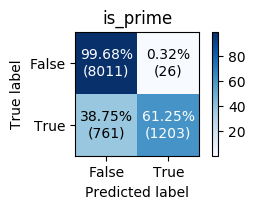

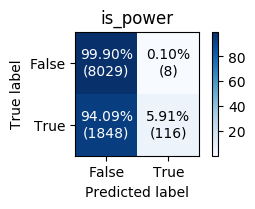

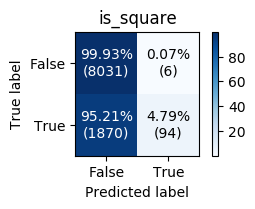

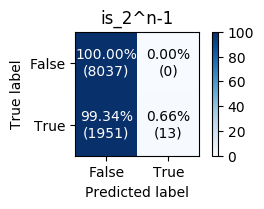

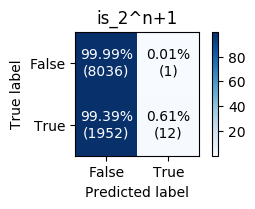

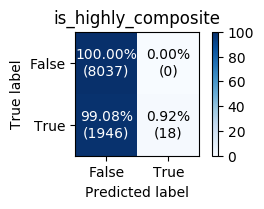

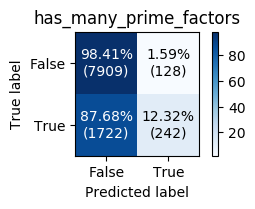

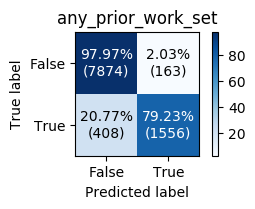

In [16]:
import itertools

def form_confusion_matrix(df, actual_label, predicted_label):
    labels = list(set(df[predicted_label].unique()) | set(df[actual_label].unique()))
    labels.sort()
    l2i = dict(((v, i) for i, v in enumerate(labels)))
    cm = np.zeros((len(labels), len(labels)), dtype=int)
    for i, row in df.iterrows():
        predicted_i = l2i[row[predicted_label]]
        actual_i = l2i[row[actual_label]]
        cm[actual_i][predicted_i] += 1
    return labels, cm

def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm_norm = 100 * cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm_norm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    thresh = cm_norm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '%0.2f%%\n(%d)' % (cm_norm[i, j], cm[i, j]),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm_norm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def show_set_predictions(df, interesting_set_labels, actual_label):
    original_figure_size = plt.rcParams["figure.figsize"]
    sns.reset_defaults()
    plt.rcParams["figure.figsize"] = (3, 2)
    for set_label in interesting_set_labels:
        labels, cm = form_confusion_matrix(df, actual_label, set_label)
        plt.figure()
        plot_confusion_matrix(cm, labels, set_label)
        plt.show()
    plt.rcParams["figure.figsize"] = original_figure_size

show_set_predictions(oeis, prior_work_set_names, 'is_popular')

From the results above, we see that these sets from prior work still do a good job of describing many of the popular numbers in OEIS.  In particular:
- _`primes`_ are a very good discriminator:
    - 97.9% of primes are popular
    - 91.3% of non-primes are not popular
- _`powers`_ are a good discriminator:
    - 93.5% of powers are popular
    - 81.3% of non-powers are not popular
- _`squares`_ are about as good as _`powers`_ at discriminating:
    - 94% of squares are popular
    - 81.1% of non-squares are not popular
- all _`2^n-1`_ are popular numbers, and 80.5% of other numbers are not popular
- all _`2^n+1`_ but one are popular numbers (92.3%), and 80.5% of other numbers are not popular
- all _`highlyComposites`_ are popular numbers, and 80.5% of non-highly-composite are not popular
- having many prime factors turns out to not be a good discriminator in this dataset (but better than observed by Gauvrit et al. in the Sloane's Gap paper)
    - 65.4% of numbers with relatively many prime factors are popular
    - 82.1% of numbers with relatively few prime factors are not popular

Combined, these sets include 1719 positive integers, 1556 of them (90.5%) are popular.  From above, we saw that there are 1964 popular integers in OEIS; 79.2% of them are accounted for by these sets, leaving 408 unaccounted for.

In [ ]:
oeis_popular = oeis[oeis.is_popular]
oeis_popular_accounted = oeis_popular[oeis_popular.any_prior_work_set]
oeis_popular_unaccounted = oeis_popular[~oeis_popular.any_prior_work_set]

print('Unaccounted:')
print([int(n) for n in oeis_popular_unaccounted.number])
print()

three_repeat_digit = [111, 222, 333, 444, 555, 666, 777, 888, 999]
print('Three-repeat-digit numbers in unaccounted:')
print(oeis_popular_unaccounted[oeis_popular_unaccounted.number.isin(three_repeat_digit)].number.values)
print()

print('Three-repeat-digit numbers in popular:')
print(oeis_popular[oeis_popular.number.isin(three_repeat_digit)].number.values)

Gauvrit et al. suggested that some of these are linked to decimal notation, offering the example that 1111, 2222, ..., 9999 are all in this unaccounted for set.  However, other than those nine numbers, none of them are obviously linked to decimal notation.  For example, of the three-digit version of that sequence, only 111 is in the unaccounted for set (it's also the only one in the popular set).

The graph below shows where the unaccounted for popular numbers fall within the OEIS popularity graph.  It seems many of them occur for smaller numbers, before a clear gap begins to appear.  Point 2 (from the section on classifying popular numbers) is a good marker of where a gap just starts appearing -- recall that it's at x=185.  Of the 408 unaccounted for integers, 20.1% are below point 2.  Additionally, 52.9% of all popular integers below point 2 are unaccounted for.  Only 1.85% of all integers are below point 2.  Therefore, it seems being smaller is also an indicator for being popular.

In [ ]:
plt.semilogy(oeis_popular_accounted.number, oeis_popular_accounted['pct'], c='#ffa0a0', marker='.', linestyle='', label='Accounted For Popular')
plt.semilogy(oeis_regular.number, oeis_regular['pct'], c='#a0a0ff', marker='.', linestyle='', label='Unpopular')
plt.semilogy(oeis_popular_unaccounted.number, oeis_popular_unaccounted['pct'], c='red', marker='.', linestyle='', label='Unaccounted For Popular')
plt.legend()
plt.show()

count_unaccounted_below_point2 = len([v for v in oeis_popular_unaccounted.number < point2.x if v])
count_all_popular_below_point2 = len([v for v in oeis_popular.number < point2.x if v])
print('Percent of unaccounted for below point 2: %0.2f%%' % (100 * count_unaccounted_below_point2 / len(oeis_popular_unaccounted)))
print('Percent of popular (below point 2) that are unaccounted: %0.2f%%' % (100 * count_unaccounted_below_point2 / count_all_popular_below_point2))

## The Most Popular

So just who are the most popular positive integers in OEIS?

In [ ]:
oeis_sorted = oeis.sort_values(by='pct', ascending=False)
tenth_value = oeis_sorted.iloc[9].pct
print(oeis_sorted[oeis_sorted.pct >= tenth_value][['number', 'count', 'pct']])

It turns out that the ten most popular positive integers in OEIS are zero through nine, mostly in that order -- zero is wedged between seven and eight.  The most popular integer is one, which is 1.5 times more popular than the second number (two).  [Nilsson](https://en.wikipedia.org/wiki/One_(Harry_Nilsson_song) and [Hutton et al., 1969](https://www.youtube.com/watch?v=d5ab8BOu4LE) conjectured that one was the loneliest number, with two being almost as lonely, but according to OEIS they are actually the most popular!

## Featured Figures and Future Figuring

We covered a lot this time:
- We got our first glimpse of the popularity of positive rationals across the three sources, then took a deep dive into the OEIS positive integers.
- The popularity of OEIS positive integers generally follows: popularity = 12.226418 * n^-1.293657 (similar to the [Sloane's Gap paper](https://arxiv.org/abs/1101.4470))
- We found that being prime, a power, one off of being a power of two, being a square number, or being highly composite are all good indicators of being popular.  Having relatively more prime factors than neighboring numbers can also be an indicator, but isn't as good.
- 20.8% of popular integers don't fall into any of those categories though.  Many of them are just small, before a noticeable gap starts appearing.
- One is the most popular positive integer in OEIS

Overall, I was generally able to replicate the findings from prior work ([Guglielmetti](https://www.drgoulu.com/2009/04/18/nombres-mineralises/) and [Gauvrit et al.](https://arxiv.org/abs/1101.4470)).  Next time, I'll venture into new territory by exploring the Numberphile positive rationals!

# Popular Numbers, Part 2: Numbers on Numberphile
(or, as I've been thinking of it: The Point Where it Gets Interesting)

![Dr. Haran pointing at the Numberphile points in a plot of the positive rationals.](images/brady-pointing-positive-rationals.png)

This is the third part in a series examining the popularity of numbers featured in various math resources. Last time, I looked at the popularity of positive integers in OEIS, generally replicating previous work ([Guglielmetti](https://www.drgoulu.com/2009/04/18/nombres-mineralises/) and [Gauvrit et al.](https://arxiv.org/abs/1101.4470)).  This time, I'm going to dive into the unexplored realm of the popularity of positive rationals in [Numberphile videos](https://www.youtube.com/user/numberphile/), a YouTube channel that's "[Videos about numbers - it's that simple.](https://www.youtube.com/user/numberphile/about)".

Last time, we saw a graph of positive rational popularity across OEIS, Numberphile, and standupmaths (shown above with Numberphile creator Dr. Haran pointing at the Numberphile data).  The graph below is just the popularity of positive rationals in Numberphile.

In [ ]:
source = 'Numberphile'
numberphile = df_positive_rational[df_positive_rational['source'] == source].copy()

transition_threshold = 250
color = colors[source]
plt.scatter(numberphile.number, numberphile['pct'], marker='.', color=color)
plt.axvline(x=transition_threshold, linestyle='dotted', color=color, alpha=0.5)
plt.show()

## Classifying the Popularity

Unlike with the OEIS data, there are very clearly three levels of popularity here: the popular (pct ≈ 0.115), the somewhat popular (pct ≈ 0.078), and the unpopular (pct ≈ 0.025).  This is in contrast to OEIS, with only two levels of popularity and a muddy gap between them.  However, like OEIS, numbers close to zero are relatively more popular than the line they seem to eventually settle into.  I eyeballed the transition point at around number=250 (the dashed line in the graph).

So who's in each popularity level?  First, let's classify them.  For the flat part, a simple kmeans clustering will do.  For the curved part, I use two simple thresholds to classify the unpopular (pct <= 0.06) and the obviously popular (pct >= 0.15).  For the region between the popular and the somewhat popular, I eyeballed a line that seemed to separate the two (similar to what we did last time for OEIS), going from (12.048, 0.118321) down to (250, 0.0965) -- 0.0965 is the average between my initial guesses for the centers of the popular and somewhat popular lines.

In [ ]:
from scipy.cluster.vq import kmeans2

estimated_popularity_centers = [0.115, 0.078, 0.025]

threshold_index = numberphile.number[numberphile.number == transition_threshold].index[0]
flat_part = numberphile[threshold_index:]
centroids, flat_groups = kmeans2(flat_part.pct, estimated_popularity_centers)
print('Popularity centers for the flat parts:\n', centroids)

curve_part = numberphile[:threshold_index]

def cluster_curved_Numberphile(row):
    if row.pct <= 0.06:
        return 2
    elif row.pct >= 0.15:
        return 0
    else:
        x1, y1 = 12.048, 0.118321
        x2, y2 = 250, (estimated_popularity_centers[0] + estimated_popularity_centers[1])/2
        m = (y1 - y2) / (x1 - x2)
        b = y1 - m * x1
        if row.pct > m * row.number + b:
            return 0
        else:
            return 1

curve_groups = curve_part.apply(cluster_curved_Numberphile, axis='columns')
numberphile['popularity_group'] = np.concatenate([curve_groups, flat_groups])

group_colors = [plt.cm.Set1.colors[g] for g in numberphile['popularity_group']]
plt.scatter(numberphile.number, numberphile['pct'], marker='.', color=group_colors)
plt.axvline(x=250, linestyle='dotted', color=color, alpha=0.5)
plt.show()

print('Size of each group:')
for i in range(3):
    print('Group', i)
    popularity_group = numberphile[numberphile.popularity_group == i]
    size = len(popularity_group)
    print('\tSize:', size)
    print('\tPercent: %0.2f%%' % (100 * size / len(numberphile)))
    print('\tAverage popularity: %0.2f%%' % (100 * popularity_group.mean().pct))

Clusters look good.  Shockingly, 99% of all the positive rationals studied are unpopular (group 2).  What numbers could be so unpopular?

## Characterizing the Unpopular Numbers

I strongly suspect that all the non-integers are in this category since 990000 is exactly how many positive non-integer rationals are included in the analysis.

In [ ]:
numberphile_nonintegers = numberphile[numberphile.number % 1 != 0]
print('Categories of non-integers:', numberphile_nonintegers.popularity_group.unique())
print('Total number of non-integers:', len(numberphile_nonintegers))

numberphile_unpopular = numberphile[numberphile.popularity_group == 2]
print('Unpopular number statistics (by count):')
print(numberphile_unpopular['count'].describe())
print('Unpopular number statistics (by pct):')
print(numberphile_unpopular['pct'].describe())

Yep, the unpopular numbers are all the non-integers.  With an average popularity of 2.7306%, they are only a quarter as popular as the popular numbers and less than half as popular as the somewhat popular numbers.  On average, they're featured in only about 10 Numberphile videos so far.  Sorry non-integers, but at least you're still [interesting](https://en.wikipedia.org/wiki/Interesting_number_paradox).

The distribution of popularity among the unpopular numbers is:

In [ ]:
numberphile_unpopular.groupby('pct').pct.count()

Most of the non-integers are between 2.2284% and 2.7855%.  A small but sizeable percentage of numbers occur in only 1.95% of videos (7 videos) and a larger percentage occurring in 3.06% of videos (11 videos).  Interestingly, there are two positive non-integers even higher.

In [ ]:
numberphile_unpopular[numberphile_unpopular.pct > 0.035]

The powers of two!  Powers of two have been observed in the OEIS data to be popular (["La minéralisation des nombres" by Guglielmetti](https://www.drgoulu.com/2009/04/18/nombres-mineralises/) and in the previous post of this series) and here we see that even the negative powers of two continue the trend of being popular.  Later in the series, we'll take a closer look at the trend of powers of two.

I'm surprised we didn't see any approximations of popular constants (e.g. 3.14 for pi) pop out among the most popular non-integers.  Later in the series we'll focus on regions around popular constants.  For now, let's move on.

## Characterizing the Popular Numbers

Now that we know what the unpopular numbers are, let's figure out who some of the popular numbers are.  Last time, I drew from previous work by [Guglielmetti](https://www.drgoulu.com/2009/04/18/nombres-mineralises/) and [Gauvrit et al.](https://arxiv.org/abs/1101.4470) to create sets of likely-popular numbers:
- _`primes`_: Prime numbers
- _`powers`_: Numbers of the form a^b (for a,b ∈ **N**)
- _`squares`_: Square numbers
- _`2^n-1`_: Numbers one less than a power of 2
- _`2^n+1`_: Numbers one more than a power of 2
- _`highlyComposites`_: Guglielmetti defines this as having more divisors than any lower number (i.e. highly composite numbers, see [5040 and other Anti-Prime Numbers](https://www.youtube.com/watch?v=2JM2oImb9Qg))
- _`manyPrimeFactors`_: Gauvrit et al. defines this as when "the number of prime factors (with their multiplicty) exceeds the 95th percentile, corresponding to the interval [n − 100, n + 100]"

In general, these turned out to be useful sets, so I'll try them again.  Luckily, I also created a function that'll do the tagging for us: `tag_with_sets_from_prior_work`!

In [ ]:
numberphile_ints = numberphile[numberphile.number % 1 == 0].copy()
prior_work_set_names = tag_with_sets_from_prior_work(numberphile_ints)
summarize_interesting_sets(numberphile_ints, prior_work_set_names)

From the results above, we see that these sets don't do a very good job at describing the popular numbers in Numberphile.  In particular:
- _`primes`_ is still a very good discriminator:
    - 100% of primes are popular
    - 99.7% of non-primes are not popular
- _`powers`_ is a horrible discriminator:
    - 4.0% of powers are popular
    - 87.4% of non-powers are not popular
- _`squares`_ is also a horrible discriminator:
    - 5.0% of squares are popular
    - 87.4% of non-squares are not popular
- _`2^n-1`_ is a poor discriminator:
    - 53.8% of numbers in this set are popular
    - 87.5% of numbers not in this set aren't popular
- _`2^n+1`_ is a fairly poor discriminator:
    - 38.5% of numbers in this set are popular
    - 87.5% of numbers not in this set aren't popular
- _`highlyComposites`_ is a fairly poor disciminator:
    - 22.2% of highly composite numbers are popular
    - 87.5% of not highly composite numbers are not popular
- _`manyPrimeFactors`_ is basically useless as a discriminator:
    - 0.3% of numbers with relatively many prime factors are popular
    - 87.0% of numbers with relatively few prime factors are not popular

Combined, these sets include 1719 positive integers, but only 1238 of them (72.0%) are popular (compared to 90.5% of them in OEIS).  Only the _`primes`_ set is a good indicator of popularity with all 1229 primes are popular.

Having now analyzed the OEIS data, I can use the popular set in OEIS as a predictor in the Numberphile data.  In other words, if it was popular in OEIS, then predict that it'll be popular in Numberphile.  The code below sets that up.